In [1]:
# Importing Libraries

import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.api as sm
import matplotlib.pyplot as plt

from sklearn import linear_model
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split as tts
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import mean_squared_error as mse # library for Mean squared error regression loss.
from sklearn.metrics import mean_absolute_error
from sklearn import metrics #accuracy score,MAE,MSE,RMSQE
from sklearn.metrics import mean_squared_error, r2_score
from yellowbrick.regressor import prediction_error # Visualize the prediction error
from yellowbrick.regressor import residuals_plot # Visualize the residuals between predicted and actual data 
from yellowbrick.model_selection import LearningCurve # Visualize Learning Curve
from sklearn.metrics import accuracy_score

In [2]:
# Reading the data set
pizza_info = pd.read_csv('pizza.csv')
pizza_info

,company,price,diameter,topping,variant,size,extra_sauce,extra_cheese,extra_mushrooms
0,A,"Rp235,000",22 inch,chicken,double_signature,jumbo,yes,yes,no
1,A,"Rp198,000",20 inch,papperoni,double_signature,jumbo,yes,yes,no
2,A,"Rp120,000",16 inch,mushrooms,double_signature,reguler,yes,yes,yes
3,A,"Rp155,000",14 inch,smoked_beef,double_signature,reguler,yes,no,yes
4,A,"Rp248,000",18 inch,mozzarella,double_signature,jumbo,yes,no,yes
...,...,...,...,...,...,...,...,...,...
124,E,"Rp39,000",8.5 inch,tuna,spicy tuna,small,yes,yes,yes
125,E,"Rp72,000",12 inch,tuna,spicy tuna,medium,yes,yes,yes
126,E,"Rp99,000",14 inch,tuna,spicy tuna,large,yes,yes,yes
127,E,"Rp44,000",8.5 inch,meat,BBQ_meat_fiesta,small,yes,no,yes


In [3]:
# Finding the number of rows and columns present in the dataset
pizza_info.shape

(129, 9)

In [4]:
# To display first five rows
pizza_info.head()

,company,price,diameter,topping,variant,size,extra_sauce,extra_cheese,extra_mushrooms
0,A,"Rp235,000",22 inch,chicken,double_signature,jumbo,yes,yes,no
1,A,"Rp198,000",20 inch,papperoni,double_signature,jumbo,yes,yes,no
2,A,"Rp120,000",16 inch,mushrooms,double_signature,reguler,yes,yes,yes
3,A,"Rp155,000",14 inch,smoked_beef,double_signature,reguler,yes,no,yes
4,A,"Rp248,000",18 inch,mozzarella,double_signature,jumbo,yes,no,yes


In [5]:
# To display last five rows
pizza_info.tail()

,company,price,diameter,topping,variant,size,extra_sauce,extra_cheese,extra_mushrooms
124,E,"Rp39,000",8.5 inch,tuna,spicy tuna,small,yes,yes,yes
125,E,"Rp72,000",12 inch,tuna,spicy tuna,medium,yes,yes,yes
126,E,"Rp99,000",14 inch,tuna,spicy tuna,large,yes,yes,yes
127,E,"Rp44,000",8.5 inch,meat,BBQ_meat_fiesta,small,yes,no,yes
128,E,"Rp78,000",12 inch,meat,BBQ_meat_fiesta,medium,no,no,yes


In [6]:
# To know the data types of each column.
pizza_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129 entries, 0 to 128
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   company          129 non-null    object
 1   price            129 non-null    object
 2   diameter         129 non-null    object
 3   topping          129 non-null    object
 4   variant          129 non-null    object
 5   size             129 non-null    object
 6   extra_sauce      129 non-null    object
 7   extra_cheese     129 non-null    object
 8   extra_mushrooms  129 non-null    object
dtypes: object(9)
memory usage: 9.2+ KB


In [7]:
# To check if there are any null values.
pizza_info.isnull().sum()

company            0
price              0
diameter           0
topping            0
variant            0
size               0
extra_sauce        0
extra_cheese       0
extra_mushrooms    0
dtype: int64

In [8]:
# To get count of duplicate rows.
len(pizza_info[pizza_info.duplicated()])

2

In [9]:
# To display number of unique values present for each column
pizza_info.nunique()

company             5
price              43
diameter           12
topping            12
variant            20
size                6
extra_sauce         2
extra_cheese        2
extra_mushrooms     2
dtype: int64

In [10]:
# Replacting 'Rp','inch' using regular expressions and converting the date type to int & float.
pizza_info['price'] = pizza_info.price.str.extract(r'(\d+[.\d]*)').astype(int)
pizza_info['diameter'] = pizza_info.diameter.str.extract(r'(\d+[.\d]*)').astype(float)
pizza_info

,company,price,diameter,topping,variant,size,extra_sauce,extra_cheese,extra_mushrooms
0,A,235,22.0,chicken,double_signature,jumbo,yes,yes,no
1,A,198,20.0,papperoni,double_signature,jumbo,yes,yes,no
2,A,120,16.0,mushrooms,double_signature,reguler,yes,yes,yes
3,A,155,14.0,smoked_beef,double_signature,reguler,yes,no,yes
4,A,248,18.0,mozzarella,double_signature,jumbo,yes,no,yes
...,...,...,...,...,...,...,...,...,...
124,E,39,8.5,tuna,spicy tuna,small,yes,yes,yes
125,E,72,12.0,tuna,spicy tuna,medium,yes,yes,yes
126,E,99,14.0,tuna,spicy tuna,large,yes,yes,yes
127,E,44,8.5,meat,BBQ_meat_fiesta,small,yes,no,yes


Exploratory Data Analaysis:

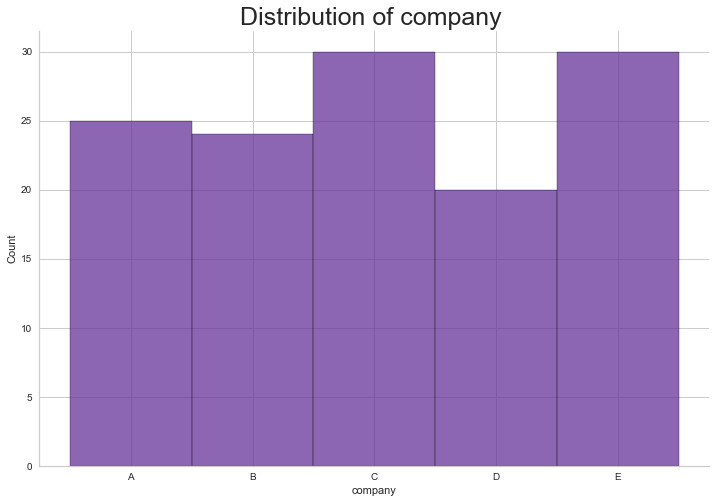

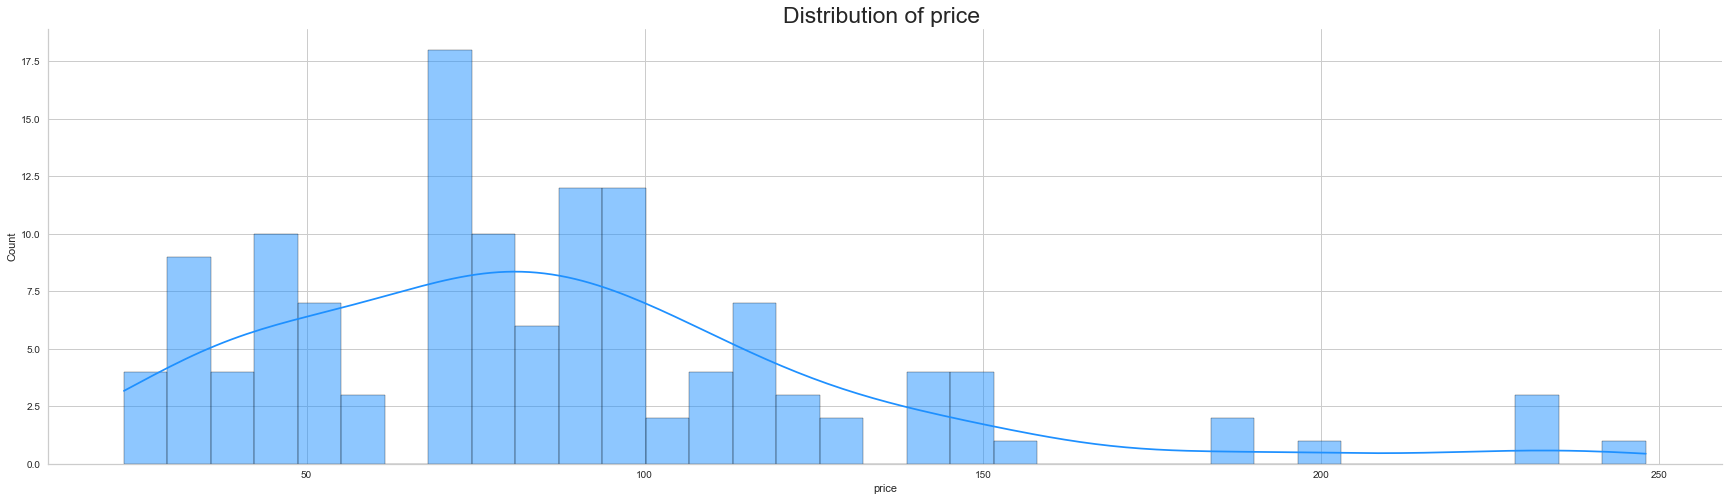

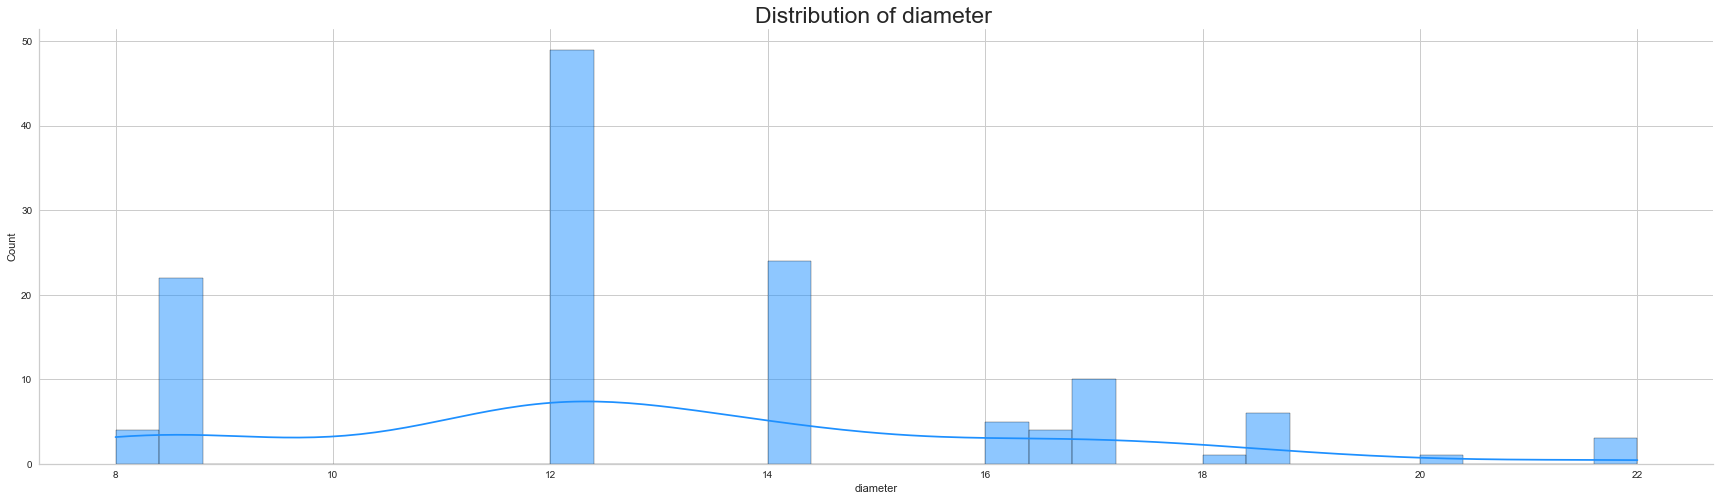

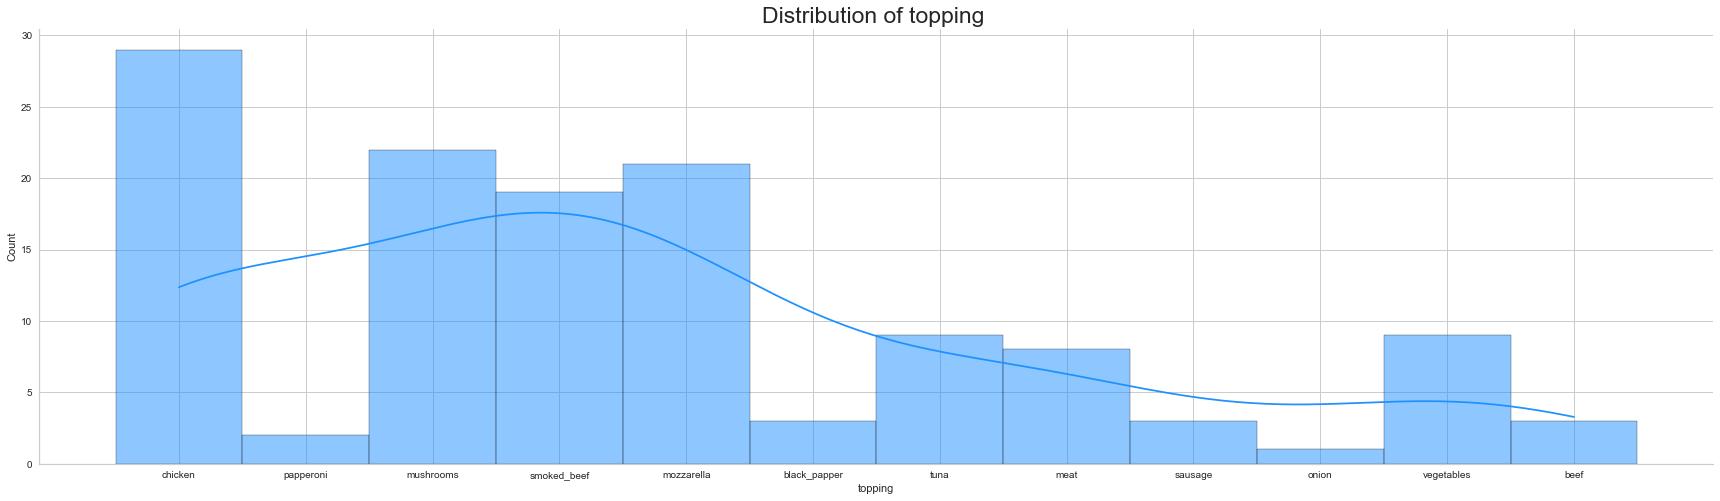

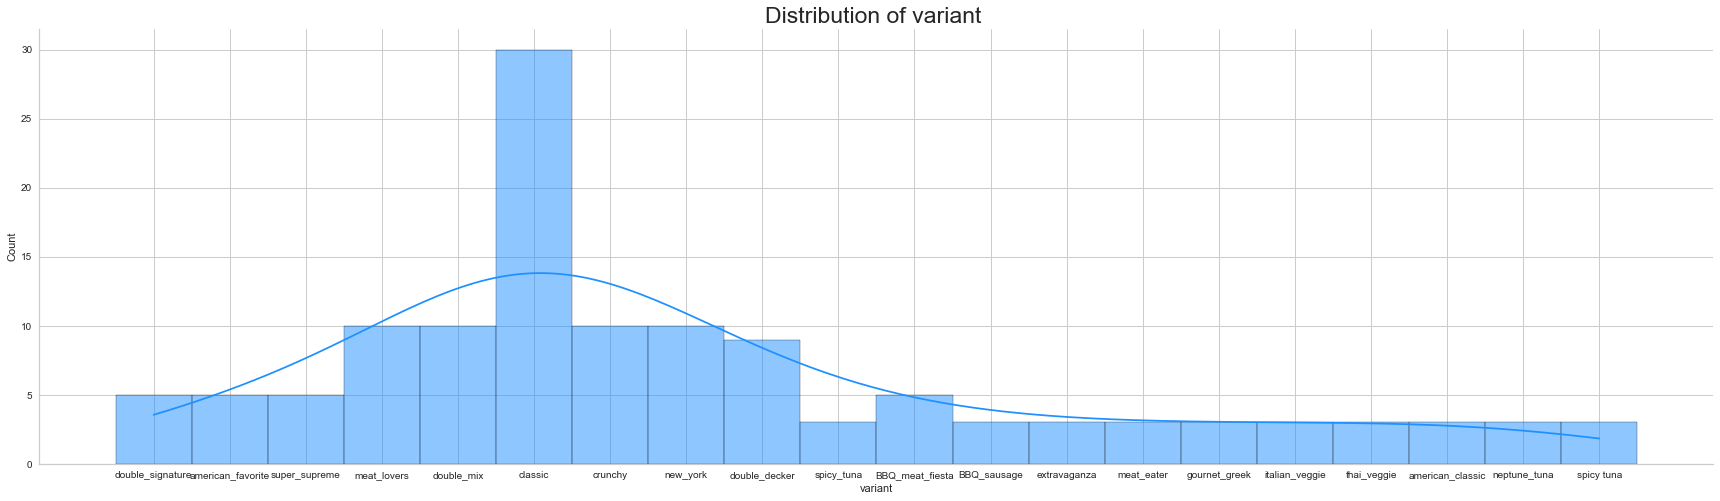

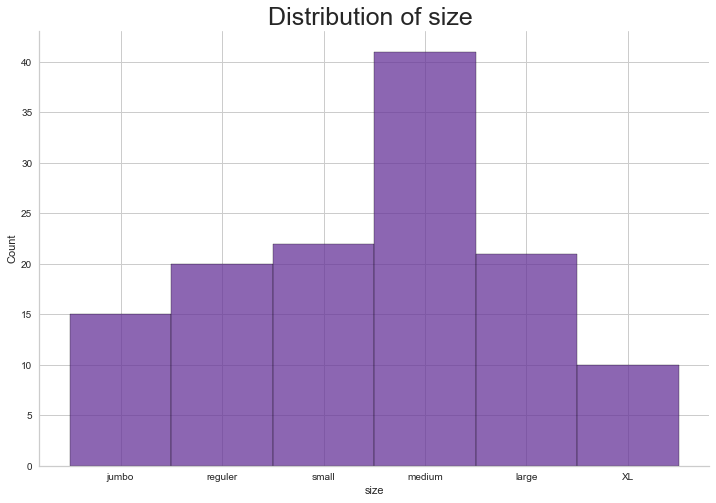

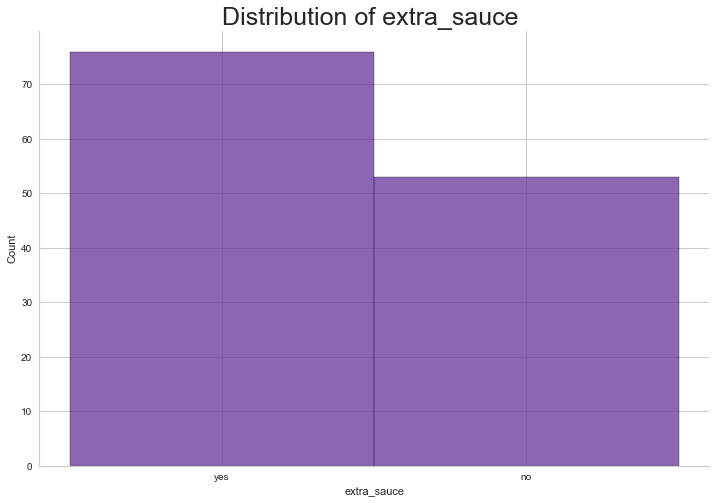

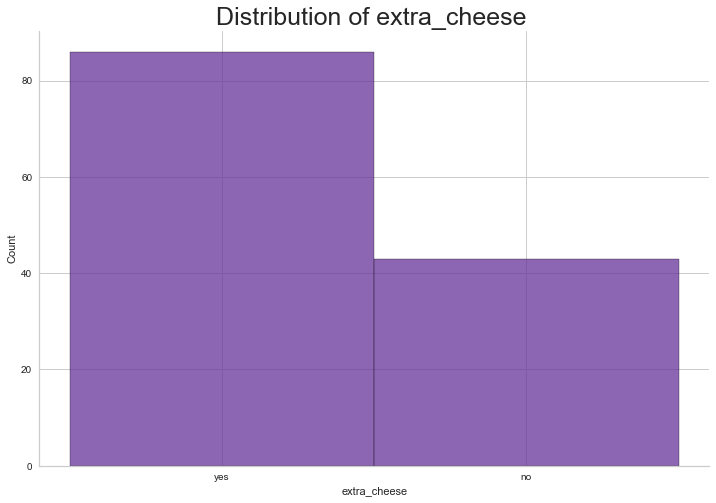

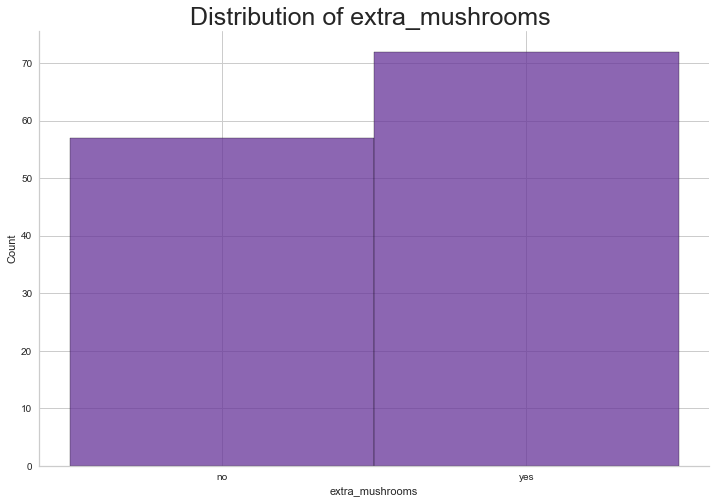

In [11]:
features = pizza_info.columns
for feature in features:
    if pizza_info[feature].nunique() > 10:
        plt.figure(figsize=(30,8))
        sns.histplot(data = features, x = pizza_info[feature], 
                     color = 'dodgerblue', bins = 35, kde = True,)
        plt.title(f"Distribution of {feature} ",fontsize = 23)
        sns.despine()
        plt.show()
    else:
        plt.figure(figsize=(12,8))
        sns.histplot(data = features, x = pizza_info[feature], 
                     color = 'rebeccapurple',kde = False)
        plt.title(f"Distribution of {feature} ",fontsize = 25)
        sns.despine()
        plt.show()

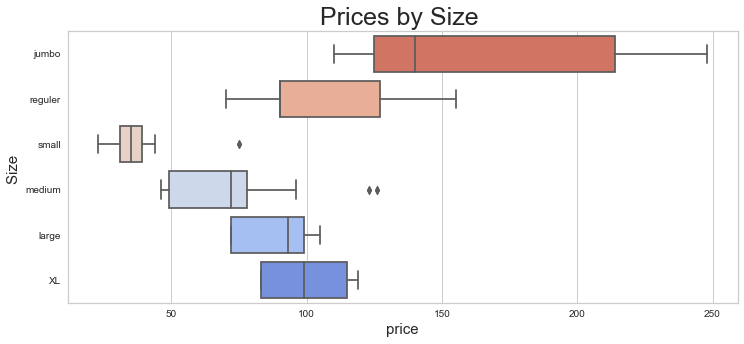

In [12]:
plt.figure(figsize=(12,5))
plt.title("Prices by Size ", fontsize = 25)
sns.boxplot(data = pizza_info, x = 'price', y = 'size', palette = 'coolwarm_r',orient = 'h')
plt.ylabel("Size ", fontsize = 15)
plt.xlabel("price", fontsize = 15)
sns.set_context("poster")
plt.show()

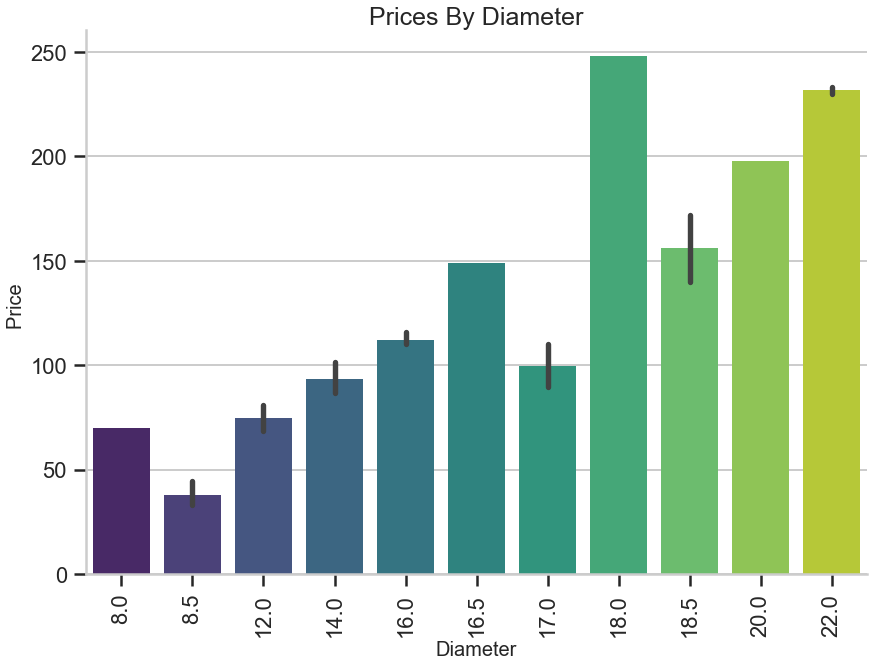

In [13]:
plt.figure(figsize=(14,10))
plt.title("Prices By Diameter", fontsize = 25)
sns.barplot(data = pizza_info, y = 'price', x = 'diameter',
               palette = 'viridis',)
plt.ylabel("Price ", fontsize = 20)
plt.xlabel("Diameter", fontsize = 20)
sns.despine()
plt.xticks(rotation=90)
plt.show()

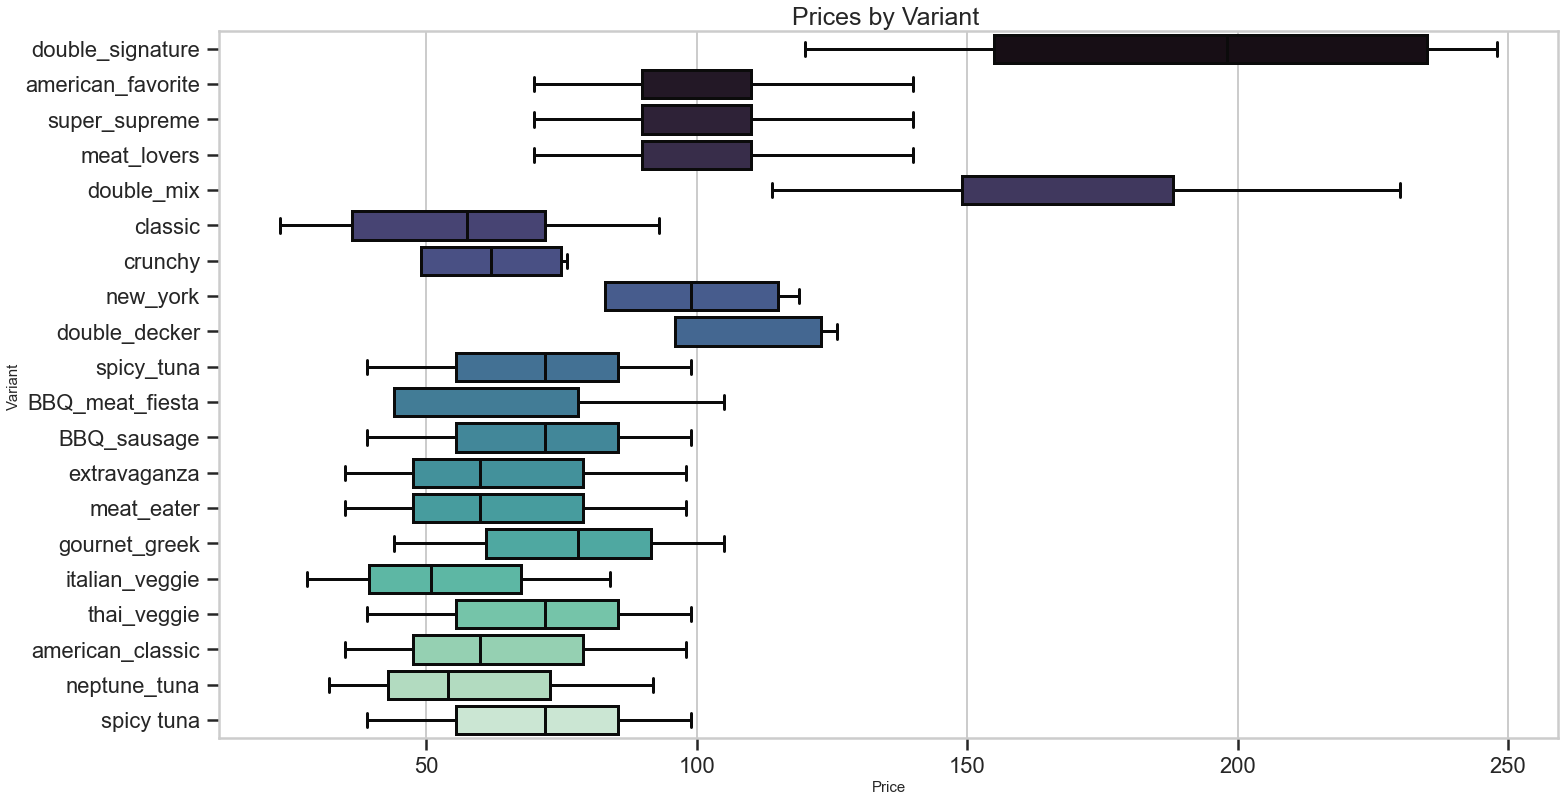

In [14]:
plt.figure(figsize=(24,13))
plt.title("Prices by Variant ",fontsize = 25)
sns.boxplot(data = pizza_info, x = 'price', y = 'variant', palette = 'mako', orient = 'h')
plt.ylabel("Variant ", fontsize = 15)
plt.xlabel("Price", fontsize = 15)
sns.set_context("talk")
plt.show()

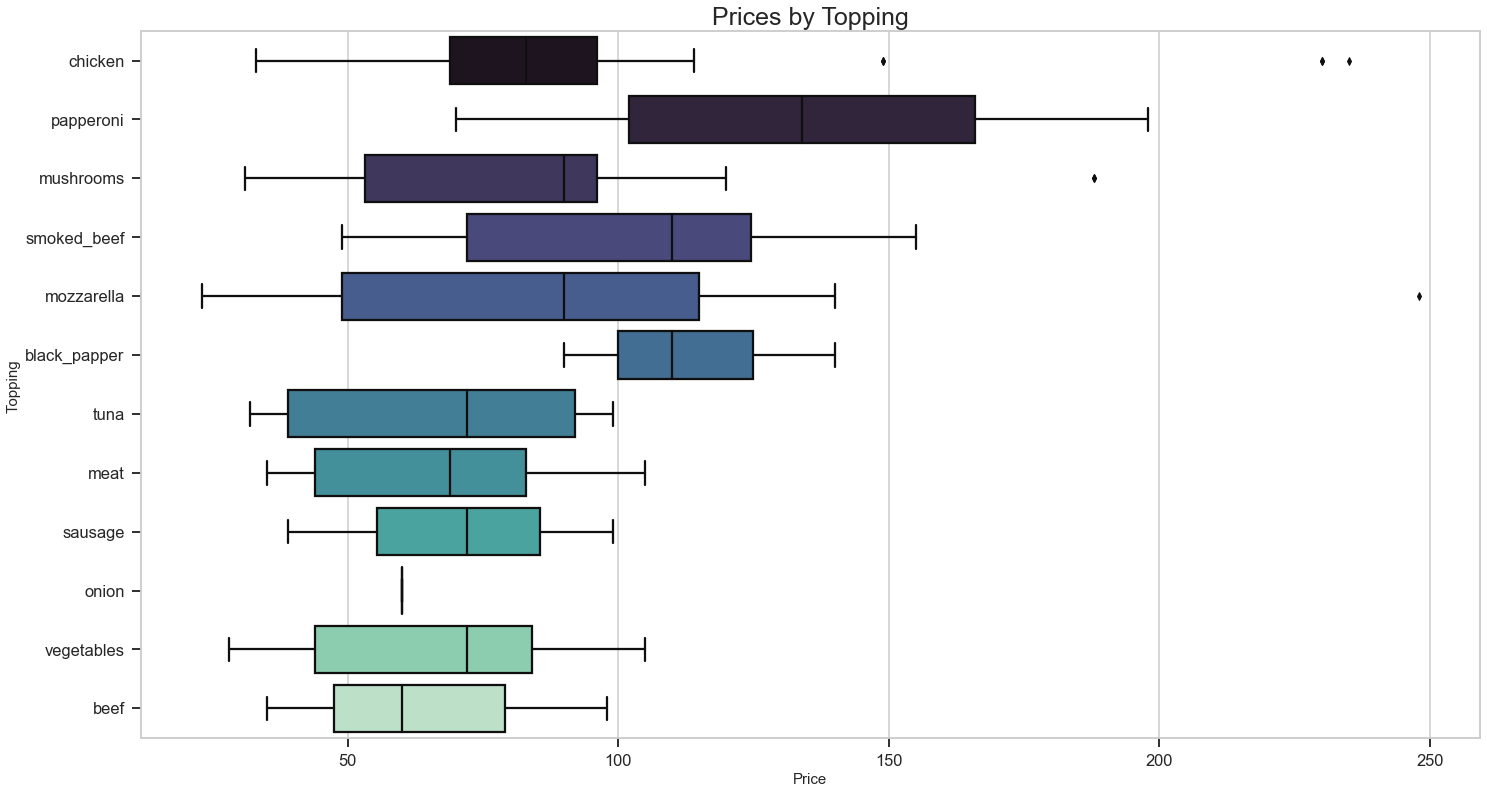

In [15]:
plt.figure(figsize=(24,13))
plt.title("Prices by Topping",fontsize = 25)
sns.boxplot(data = pizza_info, x = 'price', y = 'topping', palette = 'mako', orient = 'h')
plt.ylabel("Topping ", fontsize = 15)
plt.xlabel("Price", fontsize = 15)
sns.set_context("talk")
plt.show()

Text(0.5, 1.0, 'Prices By extra cheese')

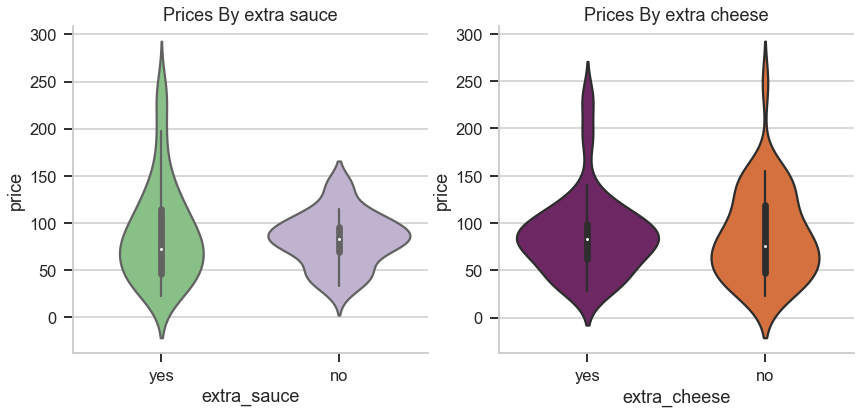

In [16]:
f = plt.figure(figsize=(14,6))
ax = f.add_subplot(121)
sns.violinplot(x='extra_sauce', y='price',data=pizza_info,palette='Accent',ax=ax)
ax.set_title('Prices By extra sauce')

ax = f.add_subplot(122)
sns.violinplot(x='extra_cheese', y='price',data=pizza_info,palette='inferno',ax=ax)
sns.despine()
ax.set_title('Prices By extra cheese')

Text(0.5, 1.0, 'Prices By extra mushrooms')

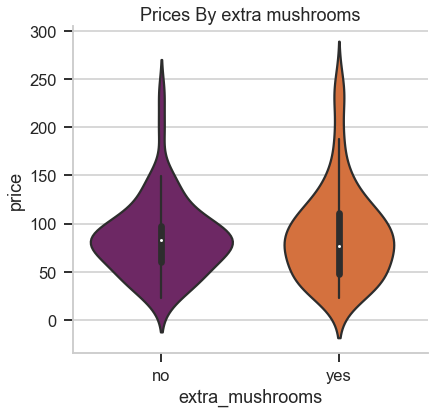

In [17]:
f = plt.figure(figsize=(14,6))
ax = f.add_subplot(121)
sns.violinplot(x='extra_mushrooms', y='price',data=pizza_info,palette='inferno',ax=ax)
sns.despine()
ax.set_title('Prices By extra mushrooms')

In [18]:
# plt.figure(figsize=(14,10))
# plt.title("Prices by Diameter / Size",fontsize = 25)
# sns.scatterplot(data = pizza_info, y = 'price', x = 'diameter', hue = 'size',
#                palette = 'magma', s = 50)
# plt.ylabel("Price ", fontsize = 15)
# plt.xlabel("Diamter", fontsize = 15)
# sns.despine()
# plt.show()


# sns.lmplot(x="diameter", y="price", hue="size", data=pizza_info, palette = 'inferno', height = 10)
# plt.ylabel("Price ", fontsize = 15)
# plt.xlabel("Diamter", fontsize = 15)
# plt.show()

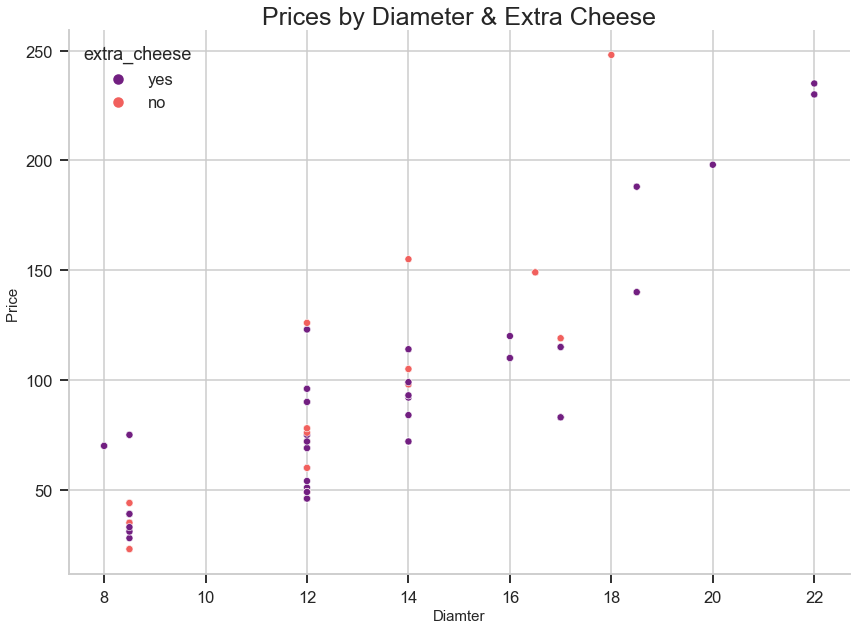

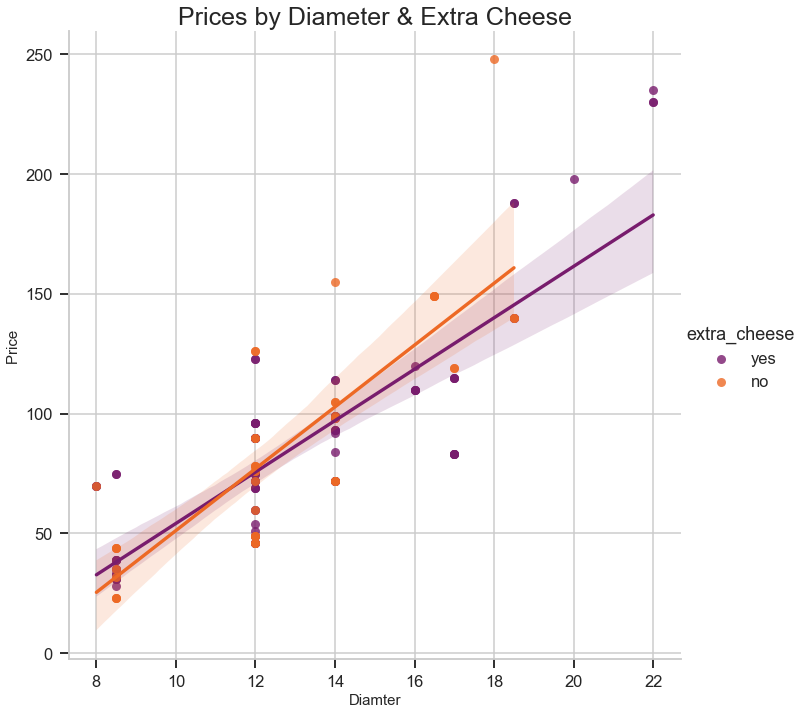

In [19]:
plt.figure(figsize=(14,10))
plt.title("Prices by Diameter & Extra Cheese",fontsize = 25)
sns.scatterplot(data = pizza_info, y = 'price', x = 'diameter', hue = 'extra_cheese',
               palette = 'magma', s = 50)
plt.ylabel("Price ", fontsize = 15)
plt.xlabel("Diamter", fontsize = 15)
sns.despine()
plt.show()


sns.lmplot(x="diameter", y="price", hue="extra_cheese", data=pizza_info, palette = 'inferno', height = 10)
plt.title("Prices by Diameter & Extra Cheese",fontsize = 25)
plt.ylabel("Price ", fontsize = 15)
plt.xlabel("Diamter", fontsize = 15)
plt.show()

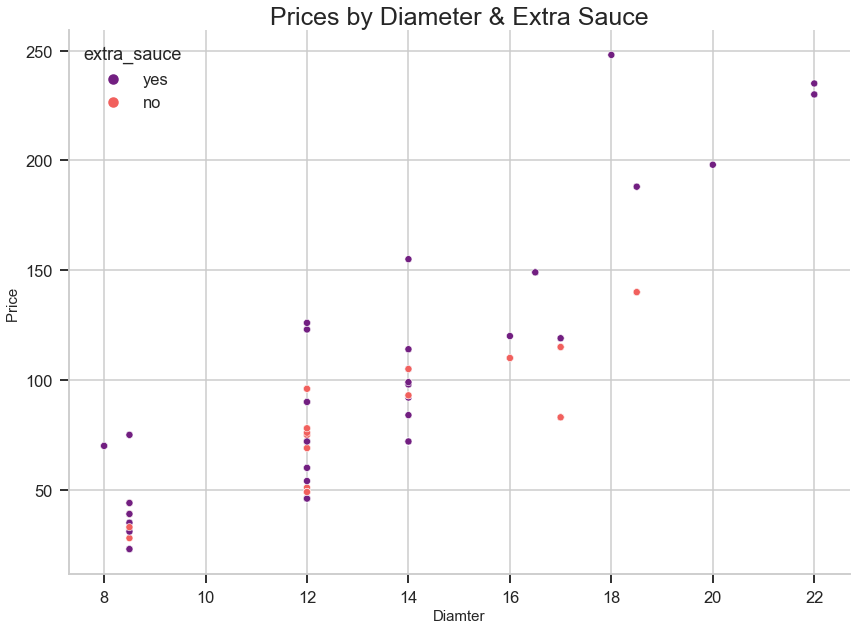

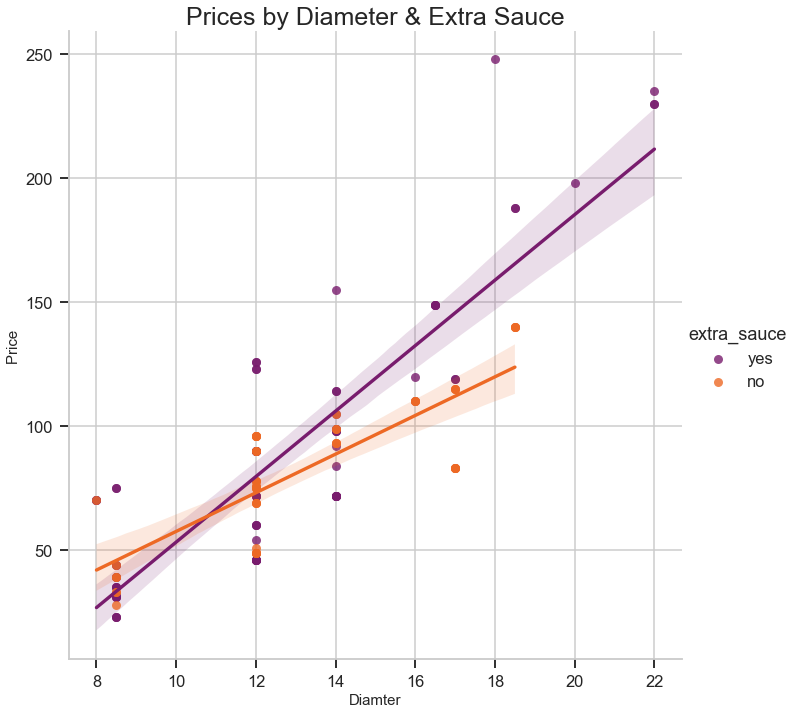

In [20]:
plt.figure(figsize=(14,10))
plt.title("Prices by Diameter & Extra Sauce",fontsize = 25)
sns.scatterplot(data = pizza_info, y = 'price', x = 'diameter', hue = 'extra_sauce',
               palette = 'magma', s = 50)
plt.ylabel("Price ", fontsize = 15)
plt.xlabel("Diamter", fontsize = 15)
sns.despine()
plt.show()


sns.lmplot(x="diameter", y="price", hue="extra_sauce", data=pizza_info, palette = 'inferno', height = 10)
plt.title("Prices by Diameter & Extra Sauce",fontsize = 25)
plt.ylabel("Price ", fontsize = 15)
plt.xlabel("Diamter", fontsize = 15)
plt.show()

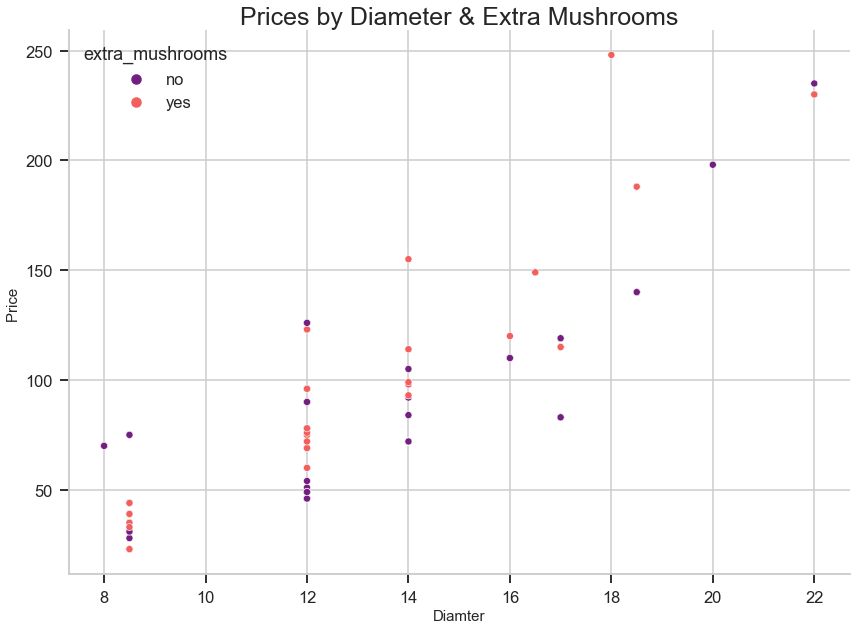

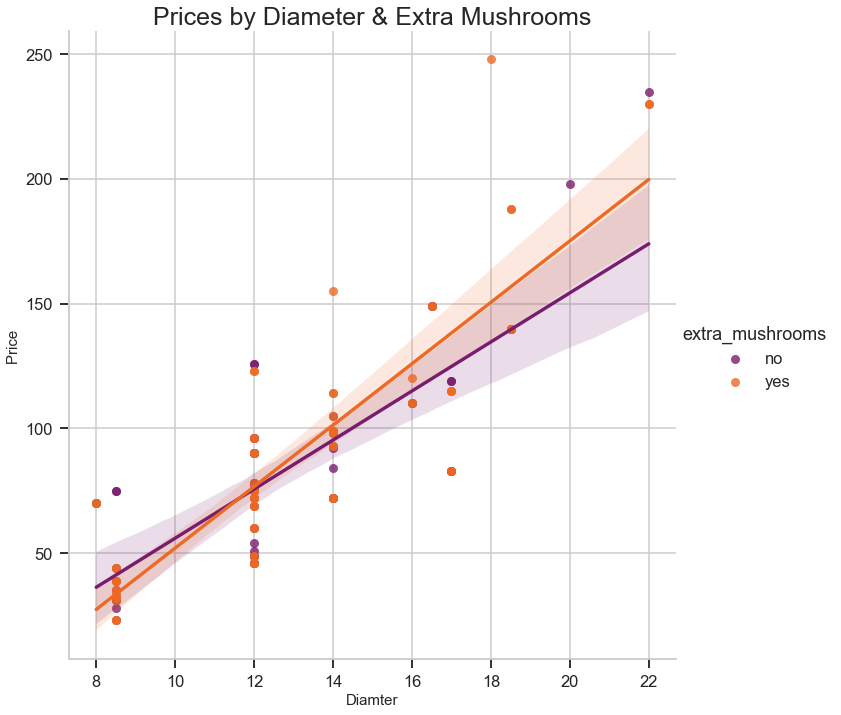

In [21]:
plt.figure(figsize=(14,10))
plt.title("Prices by Diameter & Extra Mushrooms",fontsize = 25)
sns.scatterplot(data = pizza_info, y = 'price', x = 'diameter', hue = 'extra_mushrooms',
               palette = 'magma', s = 50)
plt.ylabel("Price ", fontsize = 15)
plt.xlabel("Diamter", fontsize = 15)
sns.despine()
plt.show()


sns.lmplot(x="diameter", y="price", hue="extra_mushrooms", data=pizza_info, palette = 'inferno', height = 10)
plt.title("Prices by Diameter & Extra Mushrooms",fontsize = 25)
plt.ylabel("Price ", fontsize = 15)
plt.xlabel("Diamter", fontsize = 15)
plt.show()

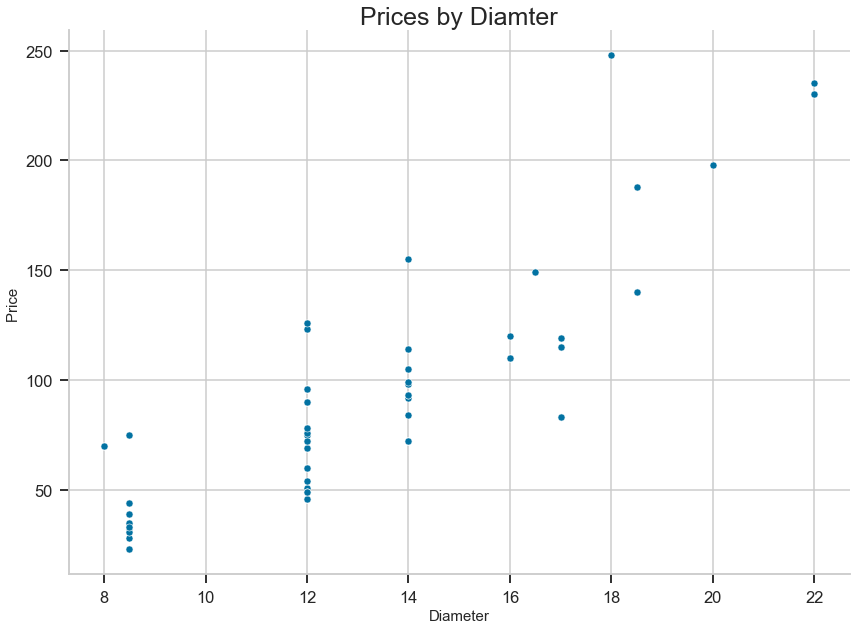

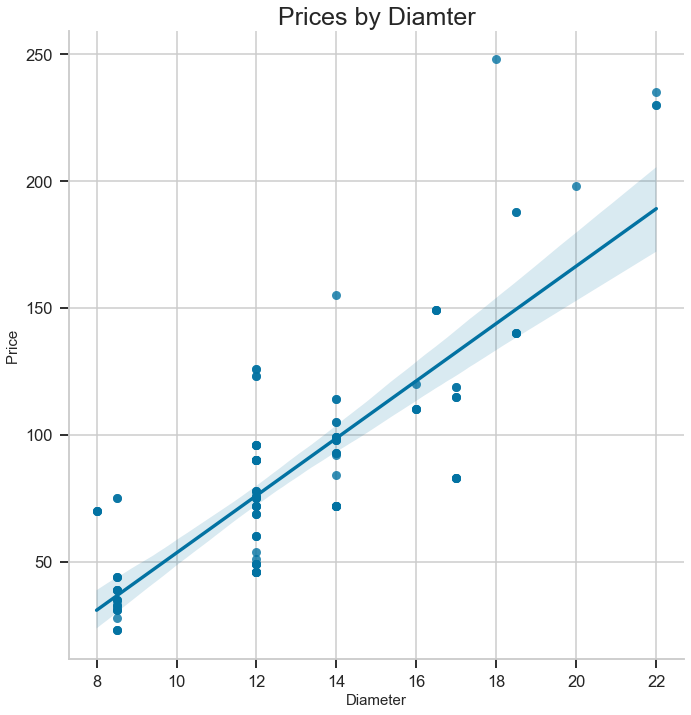

In [22]:
plt.figure(figsize=(14,10))
plt.title("Prices by Diamter",fontsize = 25)
sns.scatterplot(data = pizza_info, y = 'price', x = 'diameter',
               palette = 'magma', s = 50)
plt.ylabel("Price ", fontsize = 15)
plt.xlabel("Diameter", fontsize = 15)
sns.despine()
plt.show()


sns.lmplot(x="diameter", y="price", data=pizza_info, palette = 'inferno', height = 10)
plt.title("Prices by Diamter",fontsize = 25)
plt.ylabel("Price ", fontsize = 15)
plt.xlabel("Diameter", fontsize = 15)
plt.show()

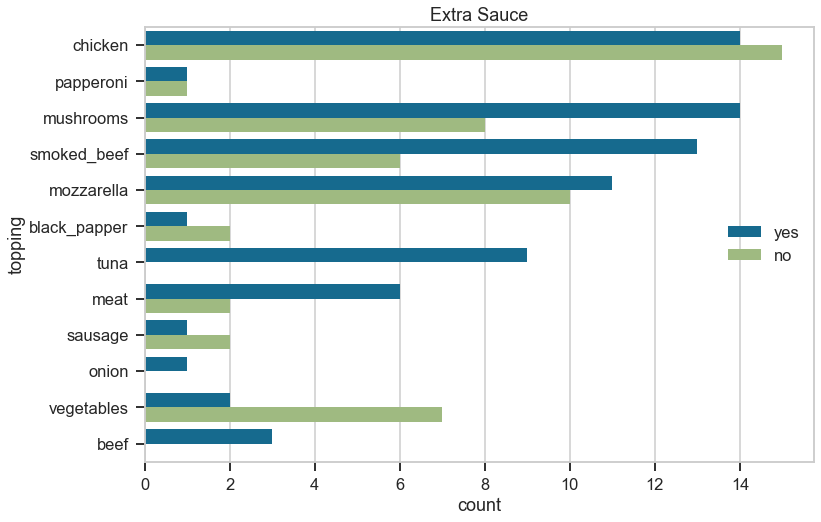

In [23]:
#topping with extra sauce
fig=plt.figure(figsize=(12,8))
sns.countplot(data=pizza_info, y="topping", hue="extra_sauce")
plt.title("Extra Sauce")
plt.legend(loc="center right")
plt.show()

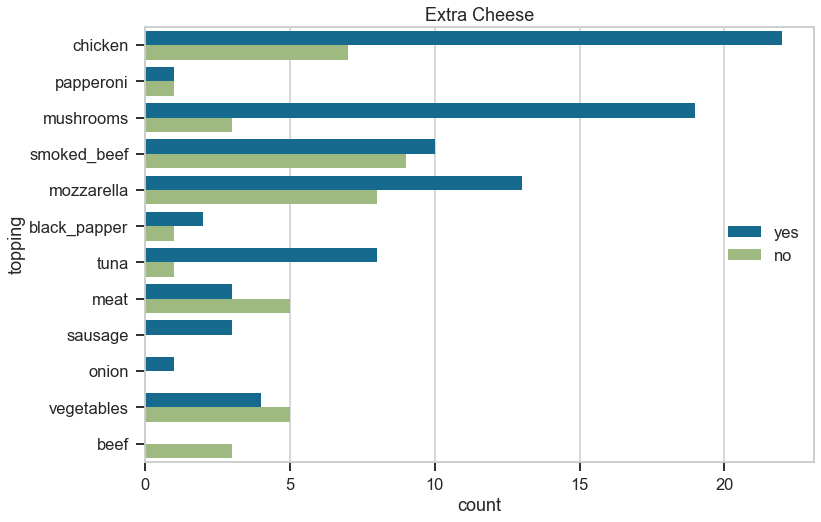

In [24]:
#topping with extra cheese
fig=plt.figure(figsize=(12,8))
sns.countplot(data=pizza_info, y="topping", hue="extra_cheese")
plt.title("Extra Cheese")
plt.legend(loc="center right")
plt.show()

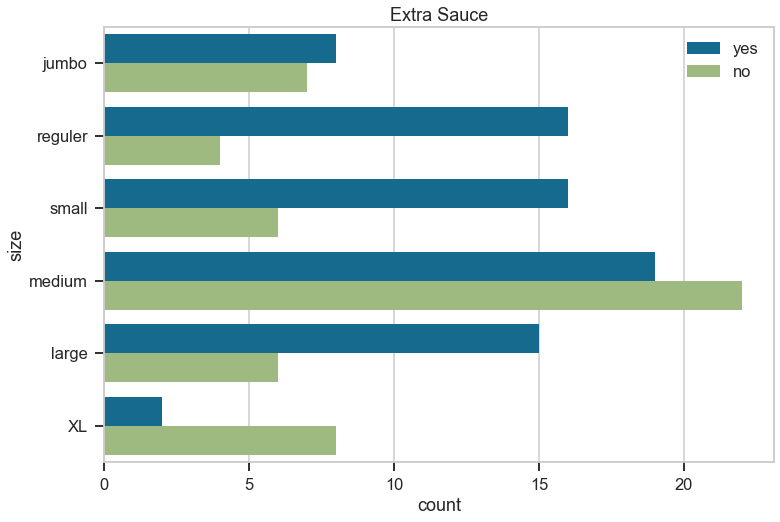

In [25]:
#size with extra sauce
fig=plt.figure(figsize=(12,8))
sns.countplot(data=pizza_info, y="size", hue="extra_sauce")
plt.title("Extra Sauce")
plt.legend(loc="upper right")
plt.show()

In [26]:
# Transforming the data type
columns = ['company', 'topping', 'variant','size','extra_sauce', 'extra_cheese', 'extra_mushrooms']
labelencoder = LabelEncoder()
for i in columns:
    pizza_info[i] = labelencoder.fit_transform(pizza_info[i])
    print( i ," ",pizza_info[i].unique())

company   [0 1 2 3 4]
topping   [ 2  7  5  9  4  1 10  3  8  6 11  0]
variant   [ 8  3 18 13  7  4  5 15  6 17  0  1  9 12 10 11 19  2 14 16]
size   [1 4 5 3 2 0]
extra_sauce   [1 0]
extra_cheese   [1 0]
extra_mushrooms   [0 1]


In [27]:
pizza_info.describe()

,company,price,diameter,topping,variant,size,extra_sauce,extra_cheese,extra_mushrooms
count,129.000000,129.000000,129.000000,129.000000,129.000000,129.000000,129.000000,129.000000,129.000000
mean,2.046512,87.131783,12.976744,5.294574,8.155039,2.868217,0.589147,0.666667,0.558140
std,1.435381,44.716010,3.272674,3.204984,5.265527,1.470437,0.493907,0.473242,0.498544
min,0.000000,23.000000,8.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,51.000000,12.000000,2.000000,4.000000,2.000000,0.000000,0.000000,0.000000
50%,2.000000,78.000000,12.000000,5.000000,6.000000,3.000000,1.000000,1.000000,1.000000
75%,3.000000,105.000000,14.000000,9.000000,13.000000,4.000000,1.000000,1.000000,1.000000
max,4.000000,248.000000,22.000000,11.000000,19.000000,5.000000,1.000000,1.000000,1.000000


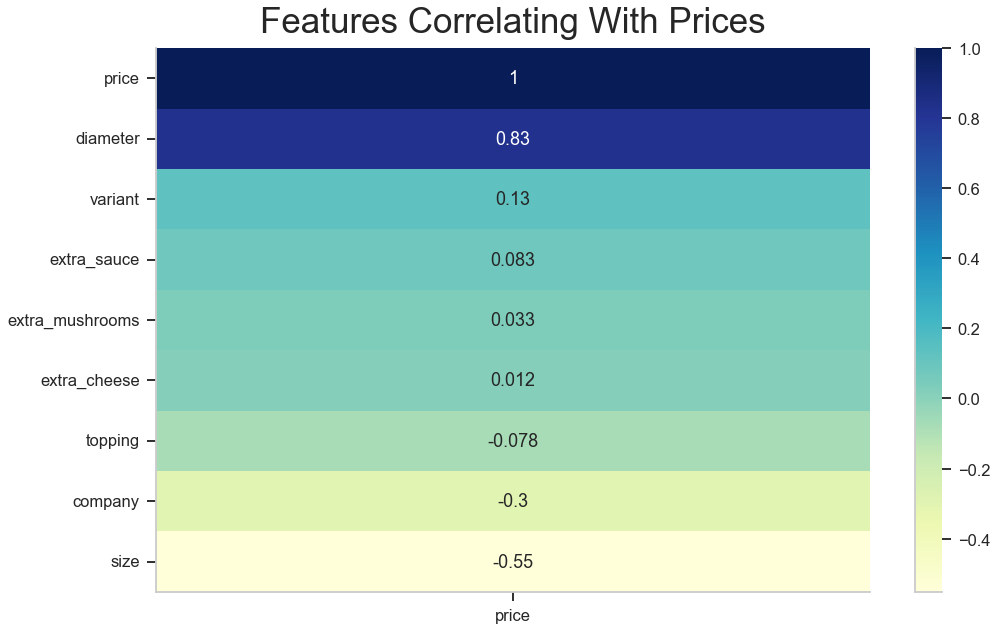

In [28]:
# To find correlation
plt.figure(figsize=(16,10))
heatmap = sns.heatmap(pizza_info.corr()[['price']].sort_values(by='price', ascending=False), annot=True, cmap='YlGnBu')
heatmap.set_title('Features Correlating With Prices', fontdict={'fontsize':35}, pad=16);
sns.despine()
plt.show()

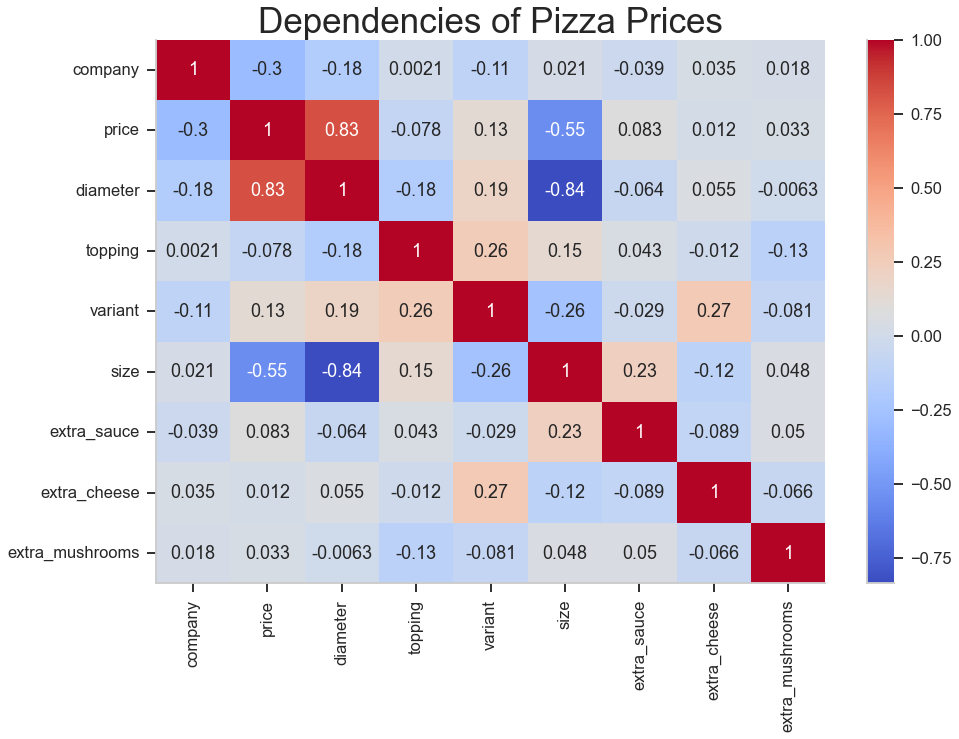

In [29]:
#Correlation using heatmap
plt.figure(figsize = (15, 10))
plt.title("Dependencies of Pizza Prices",fontsize = 35)
sns.heatmap(pizza_info.corr(), annot = True, cmap="coolwarm",cbar=True,
            linewidths=0,linecolor='white',)
sns.despine()
plt.show()

In [30]:
pizza_info.corr()['price'].sort_values()

size              -0.551879
company           -0.300134
topping           -0.077954
extra_cheese       0.012429
extra_mushrooms    0.033121
extra_sauce        0.083477
variant            0.130644
diameter           0.827205
price              1.000000
Name: price, dtype: float64

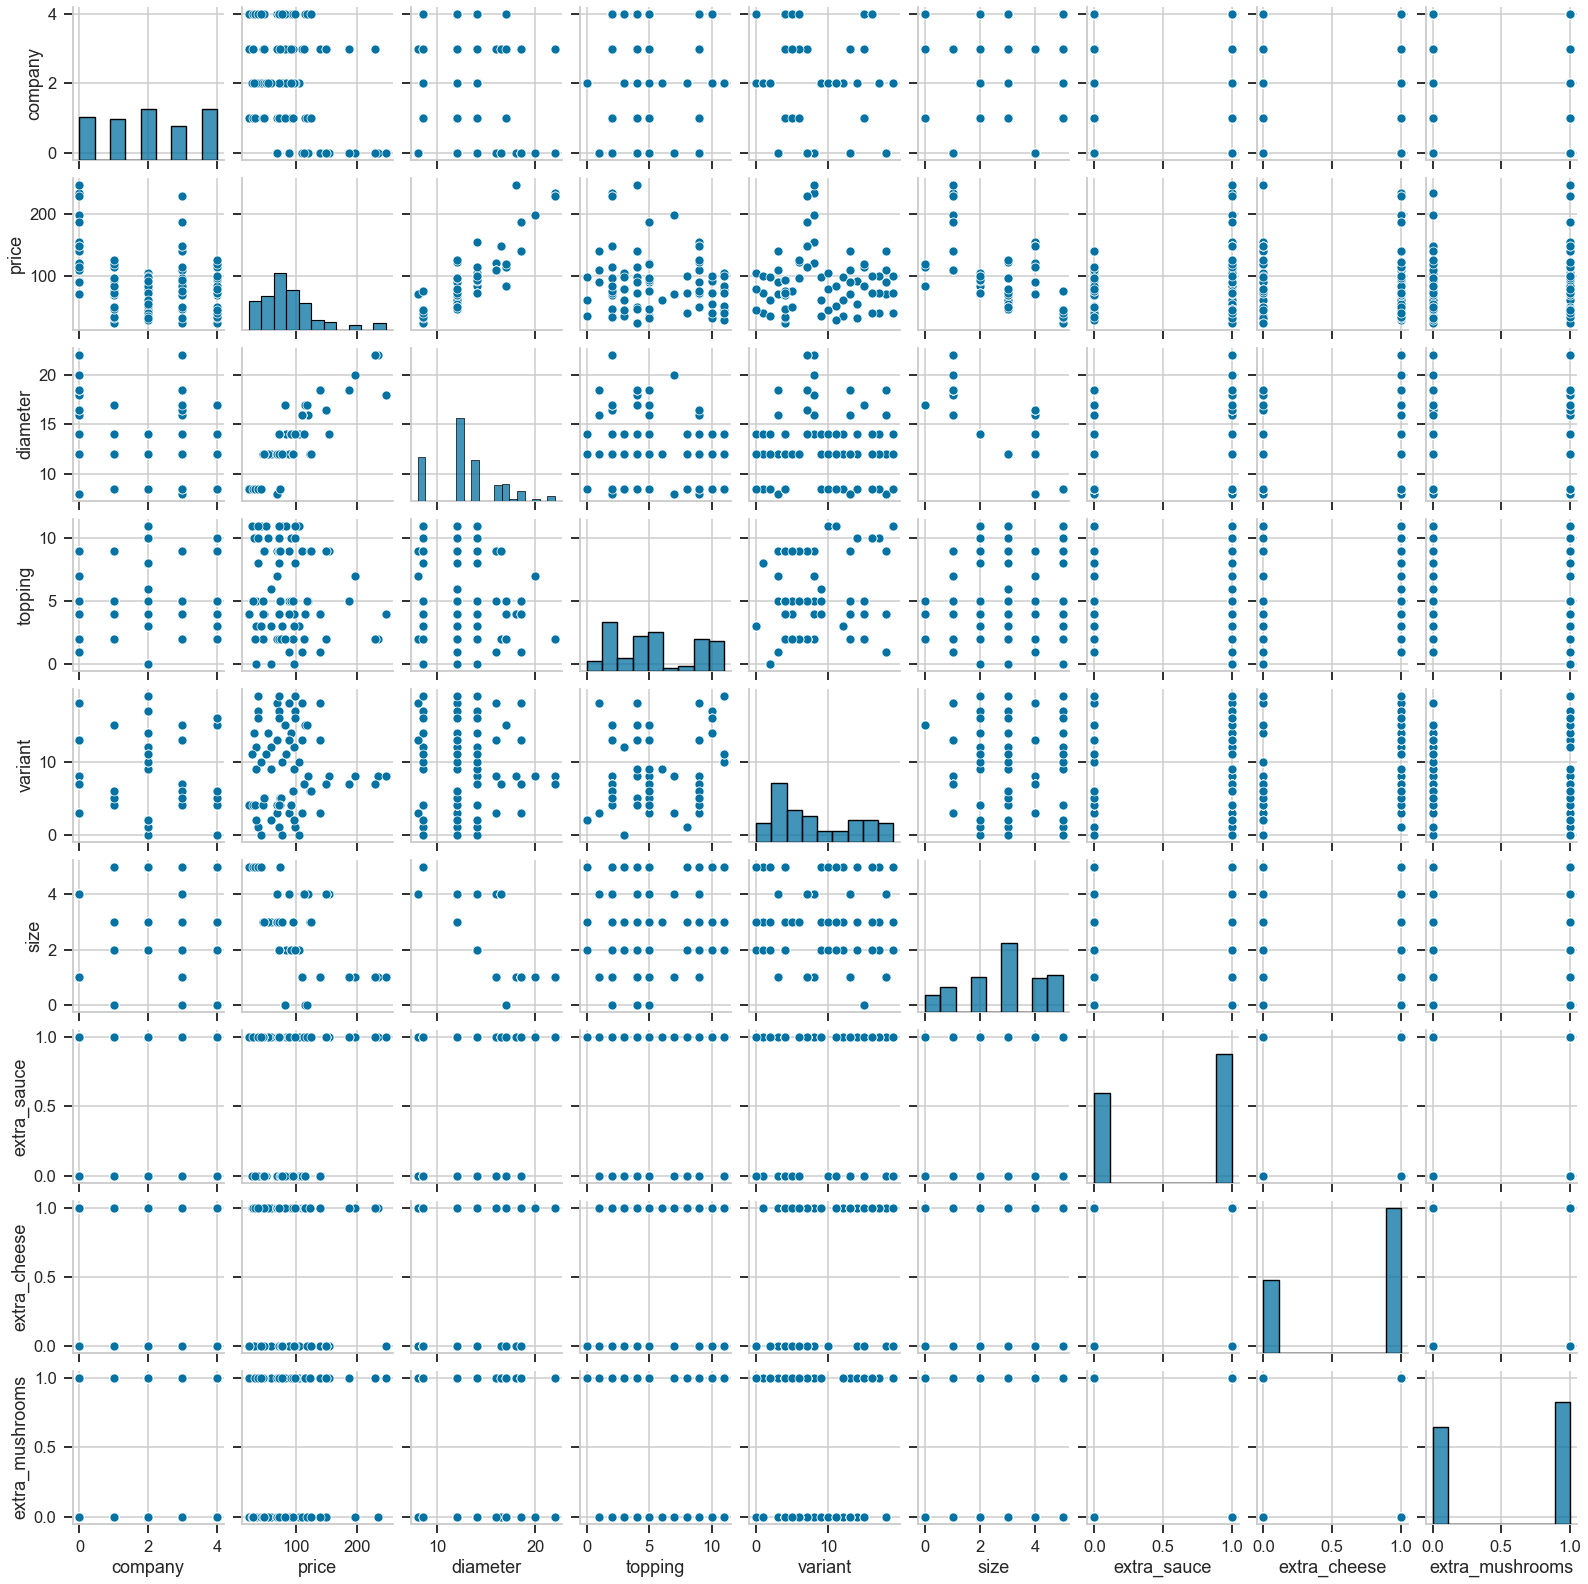

In [31]:
# Pair plotting
sns.pairplot(pizza_info)
sns.despine()
plt.show()

Models:
Model 1 - Multiple Linear Regression

In [32]:
def build_model(X,y):
    """Used to build linear regression model with stats models and print summary"""
    X = sm.add_constant(X) #Adding the constant
    lm = sm.OLS(y,X).fit() # fitting the model
    print(lm.summary()) # model summary
    return lm

In [33]:
X = pizza_info[['company', 'diameter', 'topping','variant', 'size','extra_sauce','extra_cheese','extra_mushrooms']]
y = pizza_info['price']
X_train, X_test, y_train, y_test = tts(X, y, train_size=0.75, random_state=0)
X_train.to_csv('x_train.csv',index=False)
y_train.to_csv('y_train.csv',index=False)
scaler = StandardScaler()
scaler.fit(X_train)
X_train = pd.DataFrame(scaler.transform(X_train), index = X_train.index, columns = X_train.columns )
X_test = pd.DataFrame(scaler.transform(X_test), index = X_test.index, columns = X_test.columns )

In [34]:
ln = LinearRegression()
ln.fit(X_train, y_train)

LinearRegression()

In [35]:
# Predicted values from test data set
predict_y = ln.predict(X_test) 
predict_y

array([ 68.47151992, 167.22264095,  63.47450163, 102.68445213,
        96.37992773, 106.40952912,  81.57977127, 106.40952912,
        44.6786746 ,  21.30983362,  99.13209301, 151.71975554,
        76.43026919,  87.29425531,  68.45389872,  91.00701546,
       161.17934526,  80.09907994,  82.47929485,  79.61082955,
       126.38511313,  65.53657114,  70.34516499,  72.46008393,
        66.72920367,  46.90065734,  95.8958161 , 114.95432124,
        45.64123939,  76.40978088,  80.57545243,  43.91790926,
        74.70693906])

In [36]:
mse = np.sqrt(mean_squared_error(y_test, predict_y))
r2 = r2_score(y_test, predict_y)
mae = mean_absolute_error(y_test, predict_y)

print(f"Root Mean Squared Error: {mse}", sep = "\n")
print(f"R2 Score: {r2}", sep = "\n")
print(f"Mean Absolute Error: {mae}")
print('Training Score:',ln.score(X_train, y_train))
print('Testing Score:',ln.score(X_test, y_test))


Root Mean Squared Error: 21.75682617630837
R2 Score: 0.5077712957364883
Mean Absolute Error: 18.228728576681057
Training Score: 0.7877614634774591
Testing Score: 0.5077712957364883


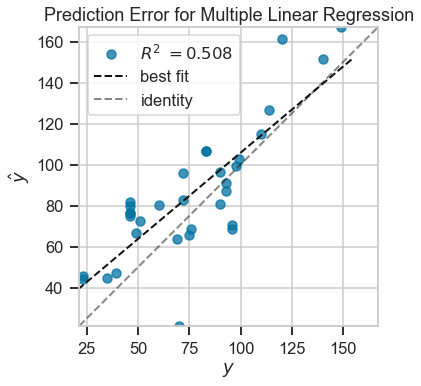

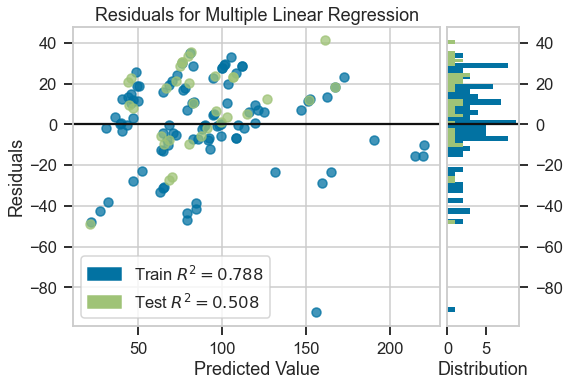

In [37]:
visualizer = prediction_error(ln, X_train, y_train, X_test, y_test,title = "Prediction Error for Multiple Linear Regression")
viz = residuals_plot(ln, X_train, y_train, X_test, y_test,title = "Residuals for Multiple Linear Regression")

In [38]:
#Build Model
def checkVIF(X):
    """Creates dataframe of variance inflation factor results"""
    vif = pd.DataFrame()
    vif['Features'] = X.columns
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return(vif)

In [39]:
# Train data
pd.options.display.float_format = '{:.5f}'.format #To remove exponential values in the summary statistics
model1 = build_model(X_train,y_train)
model = sm.OLS(y_train, X_train).fit()
print("\nResidual Standard Error: ", model.resid.std(ddof=X.shape[1]))

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.788
Model:                            OLS   Adj. R-squared:                  0.768
Method:                 Least Squares   F-statistic:                     40.36
Date:                Sun, 16 Apr 2023   Prob (F-statistic):           4.07e-26
Time:                        23:42:02   Log-Likelihood:                -432.84
No. Observations:                  96   AIC:                             883.7
Df Residuals:                      87   BIC:                             906.8
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              91.0625      2.356     

In [40]:
# Test data
model1 = build_model(X_test,y_test)
model = sm.OLS(y_test, X_test).fit()
pd.options.display.float_format = '{:.5f}'.format #To remove exponential values in the summary statistics
print("\nResidual Standard Error: ", model.resid.std(ddof=X.shape[1]))

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.861
Model:                            OLS   Adj. R-squared:                  0.814
Method:                 Least Squares   F-statistic:                     18.52
Date:                Sun, 16 Apr 2023   Prob (F-statistic):           1.62e-08
Time:                        23:42:02   Log-Likelihood:                -127.65
No. Observations:                  33   AIC:                             273.3
Df Residuals:                      24   BIC:                             286.8
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              77.8428      2.668     

In [41]:
checkVIF(X_train)

,Features,VIF
4,size,4.35000
1,diameter,4.20000
3,variant,1.26000
2,topping,1.23000
6,extra_cheese,1.11000
5,extra_sauce,1.09000
0,company,1.08000
7,extra_mushrooms,1.06000


Model 2: Random Forest Regression

In [42]:
regressor = RandomForestRegressor(n_estimators=20, random_state=0)
regressor.fit(X_train, y_train)
predictions = regressor.predict(X_test)

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, predictions))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, predictions))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))
print('accuracy:',( 1 - np.sqrt(mse) / np.mean(y_test)))
print('Training Score:',regressor.score(X_train, y_train))
print('Testing Score:',regressor.score(X_test, y_test))

Mean Absolute Error: 9.678787878787878
Mean Squared Error: 158.97484848484848
Root Mean Squared Error: 12.608522851026146
accuracy: 0.9383803429553013
Training Score: 0.9814542780205409
Testing Score: 0.8346880412965718


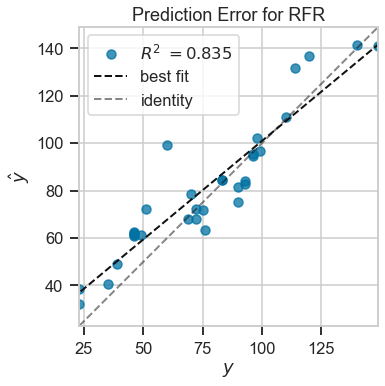

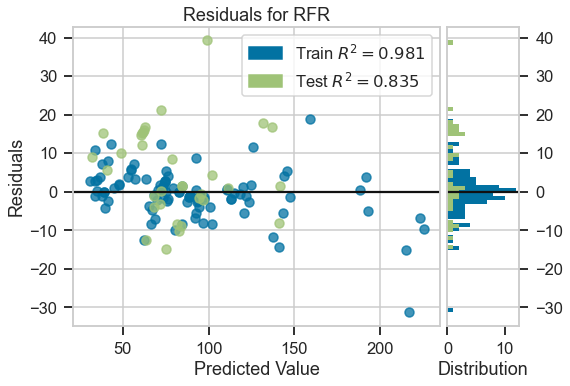

In [43]:
visualizer = prediction_error(regressor, X_train, y_train, X_test, y_test,title = "Prediction Error for RFR")
viz = residuals_plot(regressor, X_train, y_train, X_test, y_test,title = "Residuals for RFR")

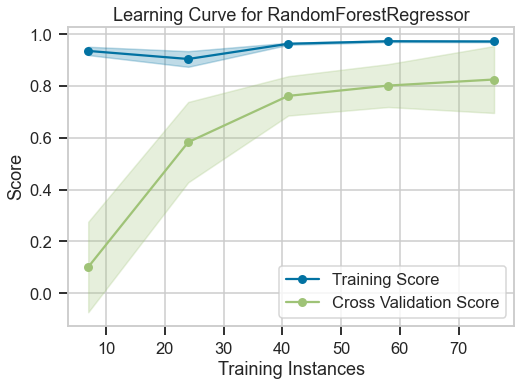

<AxesSubplot:title={'center':'Learning Curve for RandomForestRegressor'}, xlabel='Training Instances', ylabel='Score'>

In [44]:
visualizer = LearningCurve(regressor, scoring='r2')
visualizer.fit(X_train, y_train)       
visualizer.show() 

In [45]:
# Predicted values from test data set - RFR
predict_y = ln.predict(X_test) 
predict_y

array([ 68.47151992, 167.22264095,  63.47450163, 102.68445213,
        96.37992773, 106.40952912,  81.57977127, 106.40952912,
        44.6786746 ,  21.30983362,  99.13209301, 151.71975554,
        76.43026919,  87.29425531,  68.45389872,  91.00701546,
       161.17934526,  80.09907994,  82.47929485,  79.61082955,
       126.38511313,  65.53657114,  70.34516499,  72.46008393,
        66.72920367,  46.90065734,  95.8958161 , 114.95432124,
        45.64123939,  76.40978088,  80.57545243,  43.91790926,
        74.70693906])

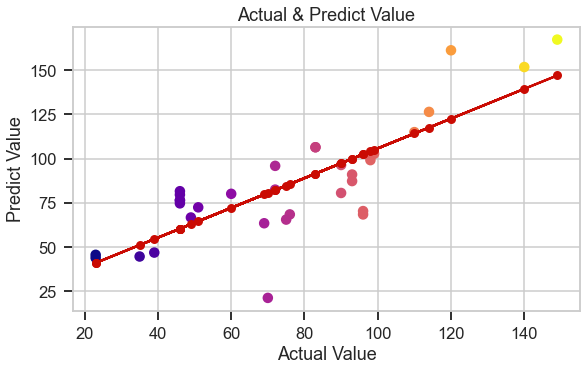

In [46]:
# Using Random Forest Regression
plt.rcParams["figure.figsize"] = [8.50, 5.50]
plt.rcParams["figure.autolayout"] = True

x = y_test
y = predict_y
fig, ax = plt.subplots()
_ = ax.scatter(x, y, c=x, cmap='plasma')
z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.title("Actual & Predict Value")
plt.xlabel("Actual Value")
plt.ylabel("Predict Value")
plt.plot(x, p(x), "r-o")

plt.show()

Model 3: Decision Tree

In [47]:
regressor = DecisionTreeRegressor(random_state=0) 
regressor.fit(X_train, y_train)
predictions = regressor.predict(X_test)

scores = cross_val_score(regressor, X_train, y_train, cv=8)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, predictions))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, predictions))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))
print('accuracy:', accuracy_score(y_test, predictions))

print('Training Score:',regressor.score(X_train, y_train))
print('Testing Score:',regressor.score(X_test, y_test))

Accuracy: 0.86 (+/- 0.19)
Mean Absolute Error: 7.575757575757576
Mean Squared Error: 170.36363636363637
Root Mean Squared Error: 13.052342179227312
accuracy: 0.5757575757575758
Training Score: 1.0
Testing Score: 0.8228452696289534


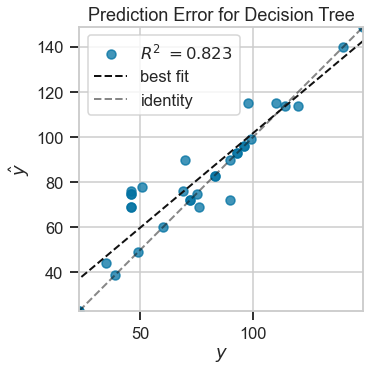

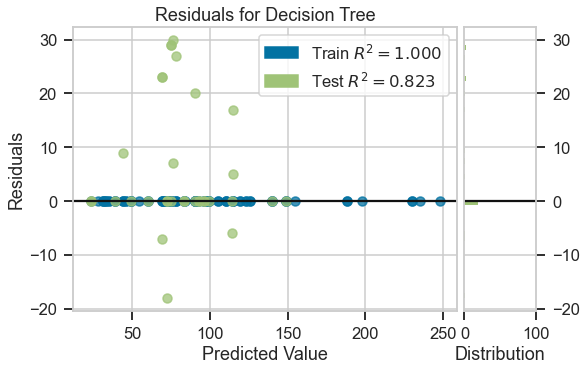

In [48]:
visualizer = prediction_error(regressor, X_train, y_train, X_test, y_test,title = "Prediction Error for Decision Tree")
viz = residuals_plot(regressor, X_train, y_train, X_test, y_test,title = "Residuals for Decision Tree")

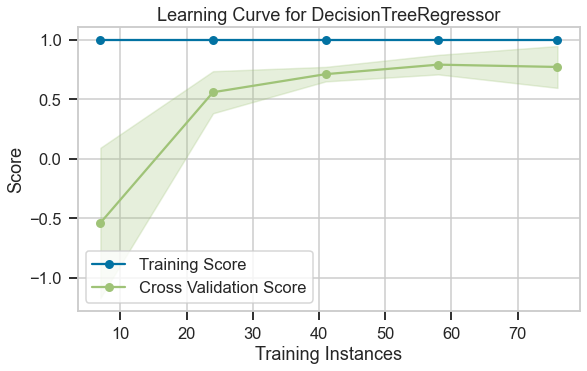

<AxesSubplot:title={'center':'Learning Curve for DecisionTreeRegressor'}, xlabel='Training Instances', ylabel='Score'>

In [49]:
visualizer = LearningCurve(regressor, scoring='r2')
visualizer.fit(X_train, y_train)       
visualizer.show() 

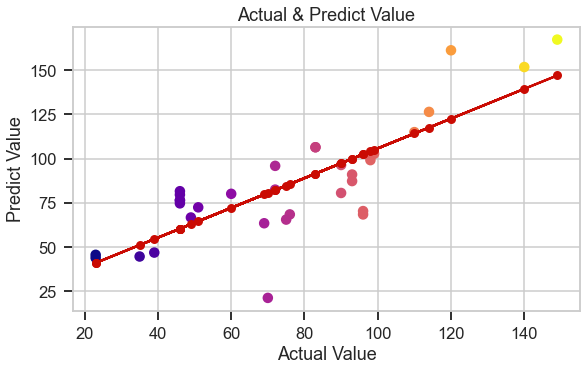

In [50]:
plt.rcParams["figure.figsize"] = [8.50, 5.50]
plt.rcParams["figure.autolayout"] = True

x = y_test
y = predict_y
fig, ax = plt.subplots()
_ = ax.scatter(x, y, c=x, cmap='plasma')
z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.title("Actual & Predict Value")
plt.xlabel("Actual Value")
plt.ylabel("Predict Value")
plt.plot(x, p(x), "r-o")

plt.show()

In [51]:
output = pd.DataFrame({'Actual price':y_test,'Predict price':predict_y})
output.to_csv('pizza price pred.csv', index =False)
output

,Actual price,Predict price
40,76,68.47152
24,149,167.22264
107,69,63.47450
51,99,102.68445
8,90,96.37993
122,83,106.40953
44,46,81.57977
104,83,106.40953
73,35,44.67867
7,70,21.30983
